In [1]:
import sps4lat.utils as uts
import sps4lat.covariance as cov 
import numpy as np 
import matplotlib.pyplot as plt 
import healpy as hp 

In [2]:
LMAX = 3000
N = 30
ell = np.linspace(0,LMAX,LMAX+1)
lmins = np.arange(0,LMAX,N)
lmaxs = np.arange(N-1,LMAX,N)
if lmaxs[-1] >= lmins[-1]:
    lmaxs = lmaxs[:-1]
if lmaxs[-1] != LMAX :
    lmaxs = np.append(lmaxs,LMAX)
domain_list = [cov.Domain(lmin,lmax) for (lmin,lmax) in zip(lmins,lmaxs)]
ell = np.array([domain.lmean for domain in domain_list])

In [3]:
real = np.random.randint(0,10)
nside = [1024,1024,1024,1024,1024]
fr = [0,1,2,3,4]
file_list = ['/Volumes/BEN_FILMS/PhD/sps4lat/data/test_maps/test_real{:d}_fr{:d}_nside{:d}.fits'.format(real,f,ns) for (f,ns) in zip(fr,nside)]
map_list = [hp.read_map(file,verbose=False) for file in file_list]

In [4]:
covmat = cov.get_covmat_maps(map_list,domain_list,None,LMAX)
covmat.shape

(100, 5, 5)

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


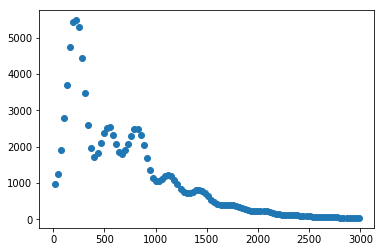

In [5]:
plt.figure()
plt.scatter(ell,ell*(ell+1)/2/np.pi*covmat[:,0,0])
plt.show()